# **Sentiment Analysis**

we will build model to perform sentimen analysis -- a subset of text classification where the task is to detect if a given sentence is positive or negative ---using **pytroch** and **torchtext**

**using IMBD dataset(using dataset library)**

# **WorkFlow**

0. importing important liberaries
1. Preparing Data
2. Build A model
3. 3.Loss Function and Optimizer
4. training And Evaluate Functions
5. Starting Training Loop
6. Visulizing Our Model
7. Testing model ,with new sentence (sentiment analysis)

# **0.Importing Important modules(libraries etc)**

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00


In [2]:
import collections # need defaultdict from collections so thats why we are using it
import datasets # module getting and handling datasets
import matplotlib.pyplot as plt # plotting our results
import numpy as np # playing with numbers
import torch #playing with tensors
import torch.nn as nn # for neural  networks
import torch.optim as optim #for neural network optimers
import torchtext # for text processing
import tqdm # for making progress bars

# **1 Preparing Data**

in preparing data there are also lot of other steps:<br>
1.1 **Loading Data** <br>
1.2 **Tokenizing data**<br>
1.3 **creating data splits**<br>
1.4 **creating a vocabulary**<br>
1.5 **numericalizing data**<br>
1.6 **converting into tensors**<br>
1.6 **creating the data loader**<br>


# **1.1 Loading the data**

In [3]:
train_data, test_data = datasets.load_dataset("imdb", split=["train", "test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

# **1.2 Tokenize you data or (Tokenization)**

In [4]:
tokenizer = torchtext.data.utils.get_tokenizer("basic_english")

In [5]:
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

In [6]:
max_length = 256

train_data = train_data.map(
    tokenize_example, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length}
)
test_data = test_data.map(
    tokenize_example, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length}
)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

# **1.3 Creating Validation Data**

In [7]:
test_size = 0.25

train_valid_data = train_data.train_test_split(test_size=test_size)
train_data = train_valid_data["train"]
valid_data = train_valid_data["test"]

# **1.4 Creating a Vocabulary**

In [8]:
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = torchtext.vocab.build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [9]:
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]

In [10]:
vocab.set_default_index(unk_index)

# **1.5 Numericalizing Our Data**

In [11]:
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return {"ids": ids}

In [12]:
train_data = train_data.map(numericalize_example, fn_kwargs={"vocab": vocab})
valid_data = valid_data.map(numericalize_example, fn_kwargs={"vocab": vocab})
test_data = test_data.map(numericalize_example, fn_kwargs={"vocab": vocab})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

# **1.6 Converting into tensors**

In [13]:
train_data = train_data.with_format(type="torch", columns=["ids", "label", "length"])
valid_data = valid_data.with_format(type="torch", columns=["ids", "label", "length"])
test_data = test_data.with_format(type="torch", columns=["ids", "label", "length"])

In [14]:
train_data[0]

{'label': tensor(1),
 'length': tensor(117),
 'ids': tensor([   40,  4500,    50,    40,  8558,    10,     5,  7130,  3594,    23,
            44,     5,  2165,     7,  5199,  1347,     6,   921,  1074,     4,
          1331, 10851,     6, 21135,  1911,     3,    39,  2060,     8,   388,
            42,   193,    64,    13,     5,  9948,  1323,   444,     4,     6,
            11,     9,    16,  1270,   356,    40,  2123,    26,     3,     0,
             4,     6,  1723,   419,   398,   386,  4763,     3,     2,   462,
           113,    30,   292,  1798,     6,  3111,    19,     5,  1222,   253,
             7,   226,     0,    21,  5563,     0,     6,     0,  2520,     3,
            14,    23,    51,    43,    85,  1563,     4,    43,    85,  3145,
          1954,     6, 17262,  2538,  3261,   530,     8,    11,     3,    12,
            59,     9,    26,   389,    11,   539,   213,    36,     2,   122,
          5563,  2026,    18,     7,    37,    65,    36])}

# **1.7 Creating Data Loaders**

In [15]:
def get_collate_fn(pad_index):
    def collate_fn(batch):
        batch_ids = [i["ids"] for i in batch]
        batch_ids = nn.utils.rnn.pad_sequence(
            batch_ids, padding_value=pad_index, batch_first=True
        )
        batch_length = [i["length"] for i in batch]
        batch_length = torch.stack(batch_length)
        batch_label = [i["label"] for i in batch]
        batch_label = torch.stack(batch_label)
        batch = {"ids": batch_ids, "length": batch_length, "label": batch_label}
        return batch

    return collate_fn

In [16]:
def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    return data_loader

In [17]:
batch_size = 512

train_data_loader = get_data_loader(train_data, batch_size, pad_index, shuffle=True)
valid_data_loader = get_data_loader(valid_data, batch_size, pad_index)
test_data_loader = get_data_loader(test_data, batch_size, pad_index)

# **2. Build the Model**

**Example Sentence**

**mujhe 2012 main sana sey allied school main peyaar howa, pir wo kidnaap ho gi , wo pir 2016 main mujhe alizey sey peyaar ho geya, us ney time pass kiya aur chor diya, pir ayesha sey baat ban gayi , likin mujhe us ki harkatain achi nhai lagi , pir ik din yakdam kidnapers ney pehali wali ko chor diya , aur hum dono ney shaddi kar li**

**LSTM**

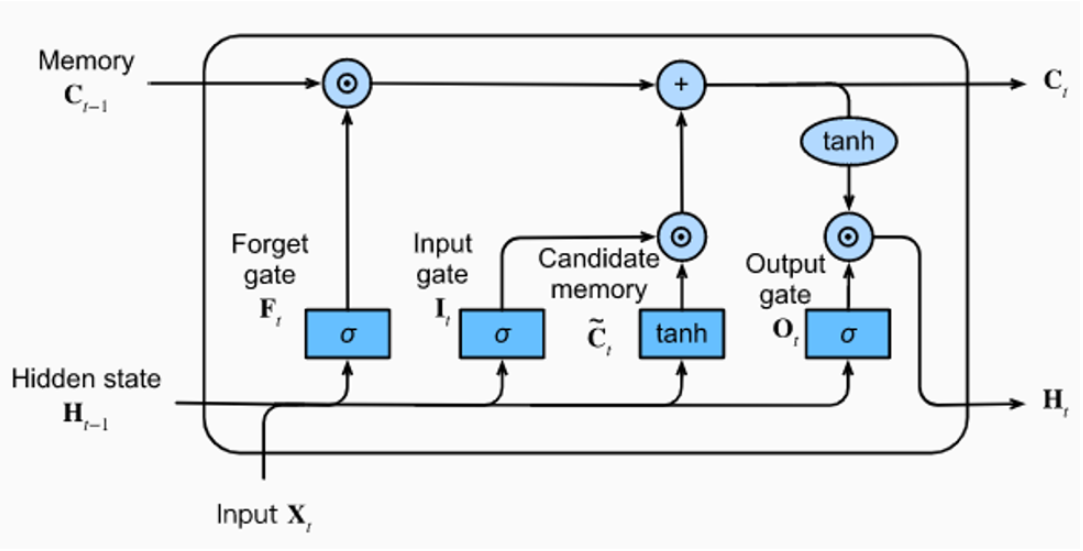

In [18]:
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers,
        bidirectional,
        dropout_rate,
        pad_index,
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, ids, length):
        # ids = [batch size, seq len]
        # length = [batch size]
        embedded = self.dropout(self.embedding(ids))
        # embedded = [batch size, seq len, embedding dim]
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        output, output_length = nn.utils.rnn.pad_packed_sequence(packed_output)
        # output = [batch size, seq len, hidden dim * n directions]
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
            # hidden = [batch size, hidden dim * 2]
        else:
            hidden = self.dropout(hidden[-1])
            # hidden = [batch size, hidden dim]
        prediction = self.fc(hidden)
        # prediction = [batch size, output dim]
        return prediction

# **Embedding Layer**

1. **nn.Embedding** is a PyTorch module that creates an embedding layer.
2. **vocab_size** is the size of the vocabulary (number of unique tokens).
3. **embedding_dim** is the dimensionality of the dense embedding vectors.
4. **padding_idx** is the index used for padding tokens, ensuring that padding tokens are ignored during training.

**This layer converts input token indices into dense vector representations (embeddings) that capture the semantic meaning of the tokens. It learns to map each token to a point in a continuous vector space.**

# **LSTM Layer**

1. **nn.LSTM** creates an LSTM layer.
2. **embedding_dim** is the size of the input features (dimension of the embeddings).
3. **hidden_dim** is the number of features in the hidden state of the LSTM.
4. **n_layers** is the number of recurrent layers in the LSTM.
5. **bidirectional** is a boolean indicating whether the LSTM is bidirectional.
6. **dropout_rate** is the dropout probability applied to the input and recurrent connections.
7. **batch_first=True** specifies that the input and output tensors are of shape (batch_size, seq_len, feature_dim).

# **Fully Connected Layer**

1. **nn.Linear** creates a fully connected layer.
2. The **input dimension** of the linear layer depends on whether the LSTM is bidirectional. If bidirectional, it's hidden_dim * 2 due to concatenation; otherwise, it's just hidden_dim.
3. **output_dim** is the dimensionality of the output tensor, typically the number of classes in a classification task.

**This layer takes the final hidden state from the LSTM and maps it to the output dimension, which is typically the number of classes in a classification task. It performs a linear transformation to produce the final predictions.**

# **Dropout:**

**nn.Dropout** applies dropout to the input and recurrent connections of the LSTM as well as the embeddings and the final hidden state.

**Dropout is applied to the embeddings and the final hidden state to regularize the model and prevent overfitting during training. It randomly sets a fraction of the input units to zero during each training iteration.**

# **Forward Method:**

# **Embedding: (embedded)**

 Token indices are passed through the embedding layer, and dropout is applied to the embeddings.

# **Packing**

**Packing:** The embedded sequences are packed to handle variable-length sequences efficiently.

**1.nn.utils.rnn.pack_padded_sequence**<br>
This is a function provided by PyTorch's nn.utils.rnn module specifically designed to handle sequences of variable lengths efficiently.

**It takes two main arguments:**<br>
1. **input:** The embedded sequences to be packed. These are the output of the embedding layer, where each token index is transformed into a dense vector representation.
2. **lengths:** A list or tensor containing the actual lengths of each sequence in the batch before padding. This information is crucial for the function to know where the sequences end and padding begins.
This is a list or tensor containing the actual lengths of each sequence in the batch before padding.
It is essential for correctly packing the sequences because it t

**Additionally, there are two optional arguments:**<br>
1. **batch_first:** A boolean indicating whether the input tensors have the batch dimension as the first dimension. If True, the input shape is assumed to be (batch_size, seq_len, embedding_dim).
2. **enforce_sorted:** A boolean indicating whether the sequences need to be sorted by length before packing. Setting it to False means PyTorch will handle sorting internally, which can save some preprocessing time.

**packed_embedded:**<br>
1. This is the output of the pack_padded_sequence function, which represents the packed version of the embedded sequences.
2. It is a special PyTorch object that contains the packed sequence data along with metadata necessary for unpacking it later.
3. The packed sequence format efficiently handles variable-length sequences by ignoring padding elements during computation, thus saving computational resources.

**packing and unpacking of sequences work in PyTorch with a detailed example.**

**Example Setup**<br>
Suppose we have three sequences of word embeddings (just for simplicity, let's assume embeddings are 1D and very short):<br>

1. Sequence A: [1, 2, 3]
2. Sequence B: [4, 5]
3. Sequence C: [6]

**Normally,** to process these sequences in a batch, we would need to pad them to the same length. The padded version might look something like this (assuming padding with zero):

1. Sequence A: [1, 2, 3]
2. Sequence B: [4, 5, 0] (padded)
2. Sequence C: [6, 0, 0] (padded)

**Packing the Sequences**

To pack these sequences, we use the pack_padded_sequence function. This function requires the sequences to be sorted by length in descending order, so we need to sort padded_sequences accordingly:

**What Does packed_sequences Contain?**<br>
The packed_sequences object is not a regular tensor; it's a PackedSequence object which contains:<br>

1. The data from the sequences without the padding (flattened according to the lengths).<br>
2. Batch sizes at each step.<br>


**For our example, packed_sequences.data would be something like:**<br>
packed_sequences.data= tensor[1,4,6,2,5,3]

This tensor represents the concatenated valid elements of the sequences. The LSTM would process these elements in this order, effectively ignoring padding.

When sequences are packed, the RNN layers can skip computations over the padding tokens. This not only speeds up the training and inference processes but also reduces memory usage since fewer time steps are actually processed.
The LSTM or other RNN layers process only the actual data points, ignoring the padding, which leads to more efficient GPU or CPU utilization.

# **LSTM Processing**

The packed sequences are passed through the LSTM layer, and the packed output is obtained.

**packed_output:**
1. This is the packed sequence containing all the output features from the LSTM layer for the input sequence data across all time steps. This output can be used if one needs to use the output of each time step, for example, in sequence tagging problems.
2. The sequence is still in its packed form to maintain efficiency in subsequent operations, such as passing through another LSTM layer or processing sequences further.

**(hidden, cell):**
1. These are tuples representing the final hidden state and final cell state of the LSTM for each layer and each direction.

**hidden:**
1. This tensor contains the final hidden states of the LSTM layers. If the LSTM is bidirectional, it includes the final states for both the forward and backward directions. The dimension of this tensor is [n layers * n directions, batch size, hidden dim]. This tensor is particularly important as it captures the learned features of the input sequence at the last time step (or the first for the backward pass in bidirectional LSTMs) which often is used for predictions in many tasks like sentiment analysis.

**cell:**
2. This tensor contains the final cell states of the LSTM layers, similar to the hidden states, with the same dimension. The cell state is used by the LSTM to internally control the flow of information by regulating the additions to the memory, forgetting the irrelevant parts of a previous state, and updating the current state.

# **Unpacking**

The packed output is unpacked to obtain the LSTM outputs.

After processing, the output is also a packed sequence. To convert it back to the padded form, use pad_packed_sequence:

After the LSTM, pad_packed_sequence is used to transform the packed sequence back to the padded sequence format. This is useful if you want to work with or examine the outputs at each timestep across all sequences.

# **Hidden State Handling**

 The final hidden state(s) are processed, including concatenation (if bidirectional) and dropout.

If the LSTM is bidirectional, it means that it processes the sequences both forwards and backwards, and the final hidden state contains information from both directions. Here's how it's handled:

**Concatenation:**
1. The final hidden state of the forward direction is accessed with hidden[-1] (which represents the last layer of the forward direction), and the final hidden state of the backward direction is accessed with hidden[-2].
2. These two hidden states are concatenated along the last dimension (dim=-1), resulting in a tensor where the information from both directions is combined.
3. This concatenation increases the dimensionality of the hidden state, so the resulting tensor has a shape of [batch size, hidden dim * 2].<br>
**Dropout:**
1. Dropout is applied to the concatenated tensor. Dropout randomly sets a fraction of the elements to zero, helping prevent overfitting by reducing the reliance of the model on specific neurons during training.

# **Prediction**

The processed hidden state is passed through the fully connected layer to generate the final predictions.

This layer takes the processed hidden states (hidden) as input. These hidden states could be from a bidirectional or unidirectional LSTM, depending on your configuration. In the case of a bidirectional LSTM, hidden will have dimensions [batch size, hidden dim * 2] due to the concatenation of the forward and backward hidden states.

The nn.Linear layer transforms the input tensor from its original hidden state dimension to the desired output dimension (output_dim).

In [19]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
output_dim = len(train_data.unique("label"))
n_layers = 2
bidirectional = True
dropout_rate = 0.5

model = LSTM(
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout_rate,
    pad_index,
)

In [20]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 10,073,402 trainable parameters


In [21]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

In [22]:
model.apply(initialize_weights)

LSTM(
  (embedding): Embedding(21542, 300, padding_idx=1)
  (lstm): LSTM(300, 300, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=600, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [23]:
vectors = torchtext.vocab.GloVe()

.vector_cache/glove.840B.300d.zip: 2.18GB [06:49, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [04:53<00:00, 7489.23it/s]


In [24]:
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

In [25]:
model.embedding.weight.data = pretrained_embedding

# **3.Loss Function and Optimizer**

In [26]:
lr = 5e-4

optimizer = optim.Adam(model.parameters(), lr=lr)

In [27]:
criterion = nn.CrossEntropyLoss()

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [29]:
model = model.to(device)
criterion = criterion.to(device)

# **4.Training And Evaluate Functions**

In [30]:
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        label = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [31]:
def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            label = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [32]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

# **5.Starting Training Loop**

In [33]:
n_epochs = 3
best_valid_loss = float("inf")

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

evaluating...: 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]


epoch: 0
train_loss: 0.631, train_acc: 0.641
valid_loss: 0.570, valid_acc: 0.708


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]


epoch: 1
train_loss: 0.514, train_acc: 0.744
valid_loss: 0.396, valid_acc: 0.822


evaluating...: 100%|██████████| 13/13 [00:03<00:00,  3.83it/s]


epoch: 2
train_loss: 0.429, train_acc: 0.807
valid_loss: 0.367, valid_acc: 0.831


# **6.Visulizing Our Model**

**visulze training loss and val loss**

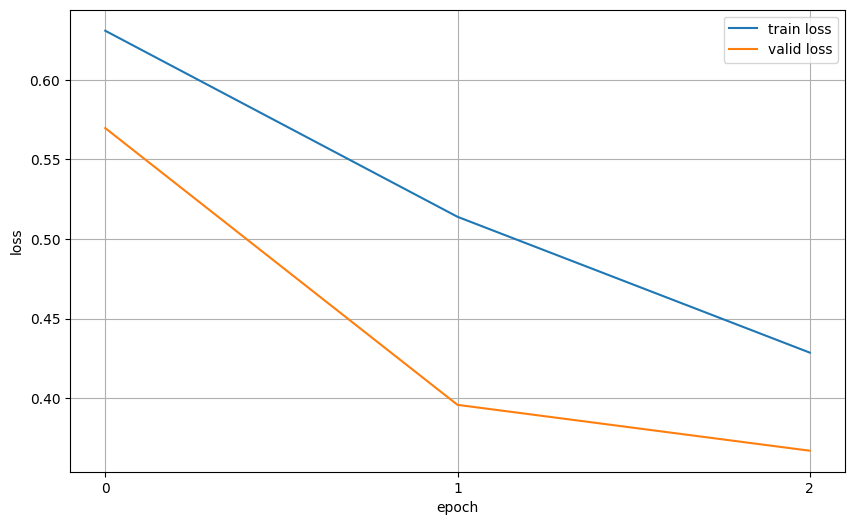

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

**visulizing train accuray and valid accuracy**

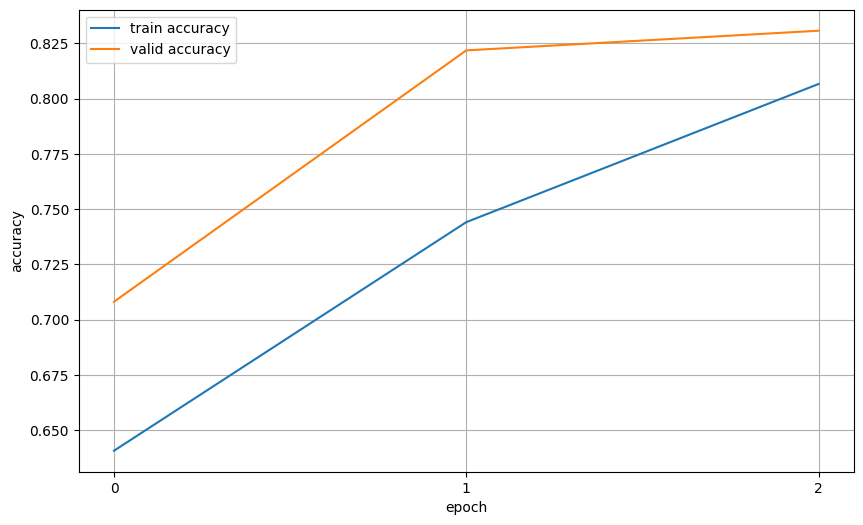

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

# **again loading state_dict()**

In [36]:
model.load_state_dict(torch.load("lstm.pt"))

test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)

evaluating...: 100%|██████████| 49/49 [00:13<00:00,  3.63it/s]


In [37]:
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

test_loss: 0.394, test_acc: 0.822


# **7.Testing model ,with new sentence (sentiment analysis)**

In [38]:
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability

In [39]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(1, 0.8850417733192444)

In [40]:
text = "This film is not terrible, it's great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(1, 0.5349324345588684)

In [42]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, vocab, device)

(0, 0.7540614604949951)